In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [17]:
data = pd.read_table('C:/Users/91898/Downloads/DS290922A-main/DATA WRANGLING/data-science-complete-tutorial-master/data-science-complete-tutorial-master/Data/house_rental_data.txt', sep = ',')
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [18]:
# Display some basic information about the dataset
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)
print("Number of unique values in each column:\n", data.nunique())


Shape of the dataset: (645, 8)
Columns in the dataset: Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')
Number of unique values in each column:
 Unnamed: 0     645
Sqft           288
Floor           21
TotalFloor      25
Bedroom          7
Living.Room      5
Bathroom         6
Price          153
dtype: int64


In [19]:
# Display some summary statistics about the dataset
print(data.describe())

       Unnamed: 0         Sqft       Floor  TotalFloor     Bedroom  \
count  645.000000   645.000000  645.000000  645.000000  645.000000   
mean   325.159690  1527.656260    5.939535   10.855814    2.837209   
std    187.312152   767.386531    3.884721    4.996208    1.010740   
min      1.000000   359.358000    1.000000    1.000000    1.000000   
25%    164.000000   925.080000    3.000000    7.000000    2.000000   
50%    326.000000  1423.200000    5.000000   12.000000    3.000000   
75%    487.000000  1892.856000    8.000000   14.000000    4.000000   
max    648.000000  5856.468000   22.000000   38.000000    7.000000   

       Living.Room    Bathroom          Price  
count   645.000000  645.000000     645.000000  
mean      1.813953    1.810853   61986.823256  
std       0.462364    0.683574   35635.091007  
min       0.000000    0.000000    6100.000000  
25%       2.000000    1.000000   39000.000000  
50%       2.000000    2.000000   50000.000000  
75%       2.000000    2.000000   

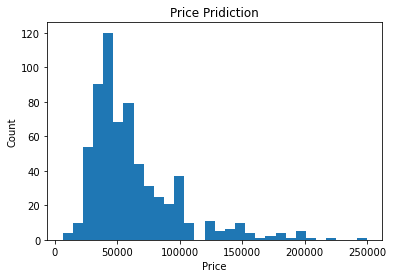

In [20]:
# Visualize the distribution of the target variable (rent amount)
plt.hist(data['Price'], bins=30)
plt.title('Price Pridiction')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

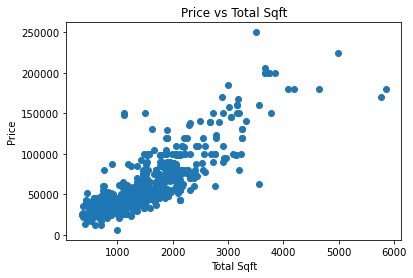

In [22]:
# Visualize the relationship between the target variable (rent amount) and some of the features (Sqft)
plt.scatter(data['Sqft'], data['Price'])
plt.title('Price vs Total Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()

In [24]:
# Manage data for training & testing
X = data[['Sqft', 'Bedroom','Living.Room','Bathroom']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


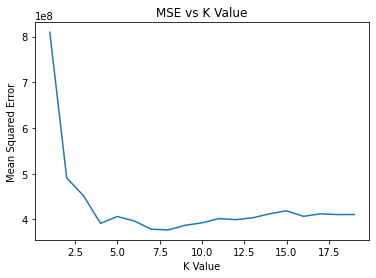

In [25]:
# Finding a better value of k
mse_list = []
k_values = range(1, 20)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
plt.plot(k_values, mse_list)
plt.title('MSE vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.show()